### Student Information
Name: Pablo 荷西

Student ID: 107065431

GitHub ID: pablomp3

---

### Instructions

- First, you should attempt the **take home** exercises provided in the [notebook](https://github.com/omarsar/data_mining_lab/blob/master/news_data_mining.ipynb) we used for the first lab session. Attempt all the exercises, as it is counts towards the final grade of your first assignment (20%). 

- Then, download the dataset provided in this [link](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The sentiment dataset contains a `sentence` and `score` label. Read the specificiations of the dataset before you start exploring it. 


- Then, you are asked to apply each of the data exploration and data operation steps learned in the [first lab session](https://github.com/omarsar/data_mining_lab) on **the new dataset**. You don't need to explain all the procedures as we did in the notebook, but you are expected to provide some **minimal comments** explaining your code. You are also expected to use the same libraries used in the first lab session. You are allowed to use and modify the `helper` functions we provided in the first lab session or create your own. Also, be aware that the helper functions may need modification as you are dealing with a completely different dataset. This part is worth 30% of your grade!

- In addition to applying the same operations from the first lab, we are asking that you attempt the following tasks on the new sentiment dataset as well (40%):
    - Use your creativity and imagination to generate **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) on how you may go about doing this. Keep in mind that you are generating a matrix similar to the term-document matrix we implemented in our first lab session. However, the weights will be computed differently and should represent the TF-IDF value of each word per document as opposed to the word frequency.
    - Using both the TF-IDF and word frequency features, try to compute the **similarity** between random sentences and report results. Read the "distance simiilarity" section of the Data Mining textbook on what measures you can use here. [Cosine similarity](https://jamesmccaffrey.wordpress.com/2017/03/29/the-cosine-similarity-of-two-sentences/) is one of these methods but there are others. Try to explore a few of them in this exercise and report the differences in result. 
    - Lastly, implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Try to implement this using scikit-learn built in classifiers and use both the TF-IDF features and word frequency features to build two seperate classifiers. Refer to this [nice article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/) on how to build this type of classifier using scikit-learn. Report the classification accuracy of both your models. If you are struggling with this step please reach us on Slack as soon as possible.   


- Presentation matters! You are also expected to **tidy up your notebook** and attempt new data operations and techniques that you have learned so far in the Data Mining course. Surprise us! This segment is worth 10% of your grade. The idea of this exercise is to begin thinking of how you will program the concepts you have learned and the process that is involved. 


- After completing all the above tasks, you are free to remove this header block and **submit** your assignment following the guide provided in the [README.md](https://github.com/omarsar/dm_2018_hw_1/blob/master/README.md) file of the assignment's repository. 

In [223]:
# EXERCISE 2 TAKE HOME

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
#print(twenty_train.target)

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

# Obtain the same results as in the previous example with isin

d = X[X.index.isin([0,10,20,30,40,50,60,70,80,90])]
print(d)

                                                 text  category  \
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1   
10  From: anasaz!karl@anasazi.com (Karl Dussik) Su...         3   
20  From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...         3   
30  From: vgwlu@dunsell.calgary.chevron.com (greg ...         2   
40  From: david-s@hsr.no (David A. Sjoen) Subject:...         3   
50  From: ab@nova.cc.purdue.edu (Allen B) Subject:...         1   
60  From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...         0   
70  From: weaver@chdasic.sps.mot.com (Dave Weaver)...         3   
80  From: annick@cortex.physiol.su.oz.au (Annick A...         2   
90  Subject: Vonnegut/atheism From: dmn@kepler.unh...         0   

             category_name  
0            comp.graphics  
10  soc.religion.christian  
20  soc.religion.christian  
30                 sci.med  
40  soc.religion.christian  
50           comp.graphics  
60             alt.atheism  
70  soc.religion.christian  
8

In [224]:
# EXERCISE 5 TAKE HOME
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

NA_df['missing_example'].isnull()

# 0 np.nan null       - NaN, 'float' object has no attribute 'isnull', then it is missing
# 1        null       - missing
# 2 'NaN'  non-null   - text (not missing)
# 3 'None' non-null   - text (not missing)
# 4 None   null       - None interpreted as missing
# 5 ''     non-null   - interpreted as text (not missing)

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [225]:
# EXERCISE 6 TAKE HOME

# The length of the dataframe has been reduced from 2257 spots to 1000, by means of a random sampling technique. Afterwards,
# the first 4 samples of the randomly sorted dataframe have been printed.
# ---------------------------------------------------------------------------------
# TEST:
# X_sample = X.sample(n=8) #random state
# X_sample[0:10]

# If you perform this test, please we aware that the sample will modify the output of the following exercises

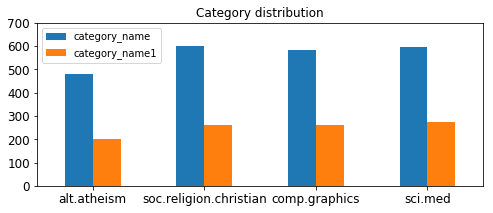

In [226]:
# EXERCISE 8 TAKE HOME

X_sample = X.sample(n=1000) #random state

import matplotlib.pyplot as plt
%matplotlib inline

grafica = pd.DataFrame({'category_name': X.category_name.value_counts(), 'category_name1': X_sample.category_name.value_counts()}, index = categories)

grafica.plot(kind = 'bar',
            title = 'Category distribution',
            ylim = [0, 700], 
            rot = 0, fontsize = 12, figsize = (8,3))

In [227]:
import nltk
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))


In [228]:
# EXERCISE 10 TAKE HOME

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

#count_vect.get_params(deep=True)
#count_vect.get_feature_names()[37:38]
algo = X_counts[4:5, 0:100].toarray()  #array
#print(algo)
bella = X_counts[0:5, 0:100]  #sparse
print(bella)
#forma = [1, 1]  #1 sample 1 features

count_vect.inverse_transform(algo)

  (4, 37)	1
  (4, 0)	1


[array(['00', '01'], dtype='<U80')]

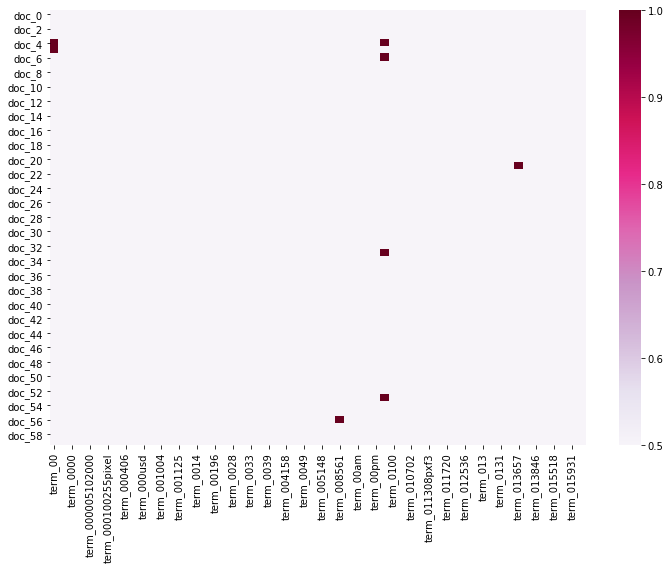

In [229]:
# EXERCISE 11 TAKE HOME

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:60]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:60]]
plot_z = X_counts[0:60, 0:60].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(12, 8))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0.5, vmax=1, annot=False)

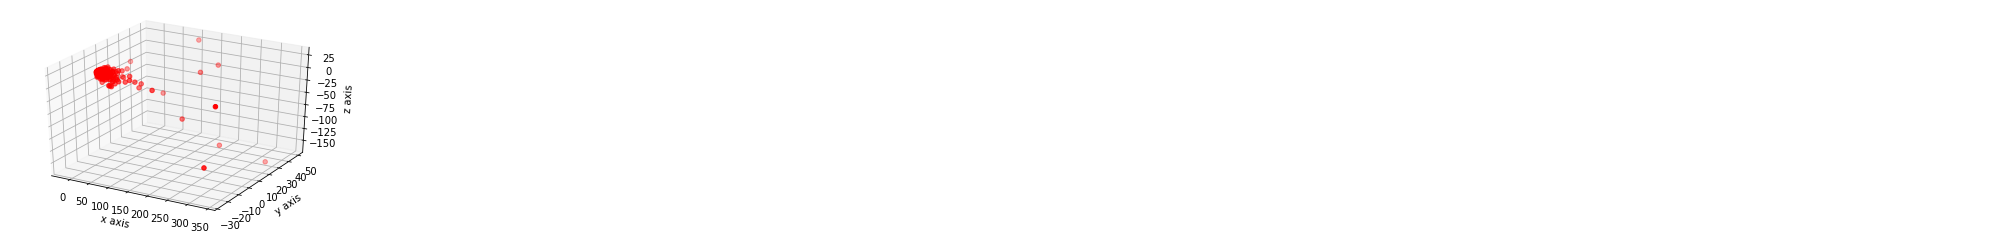

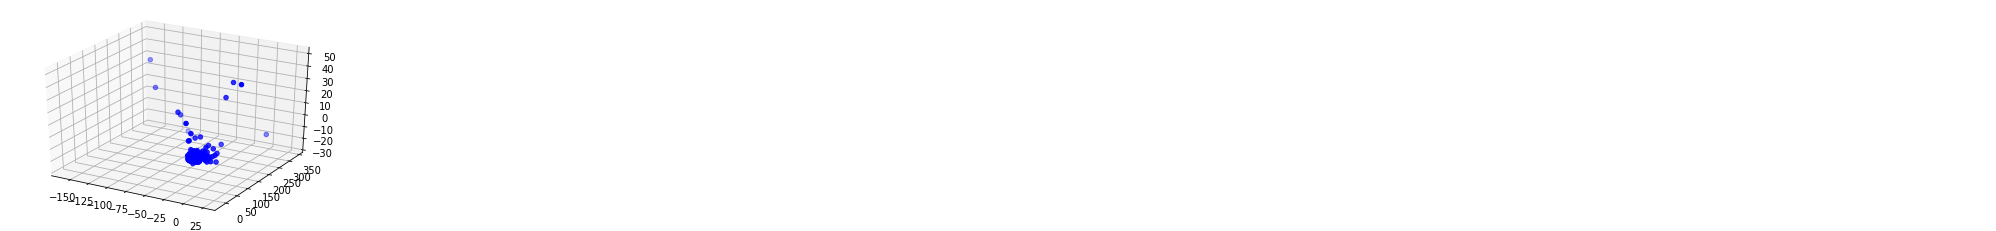

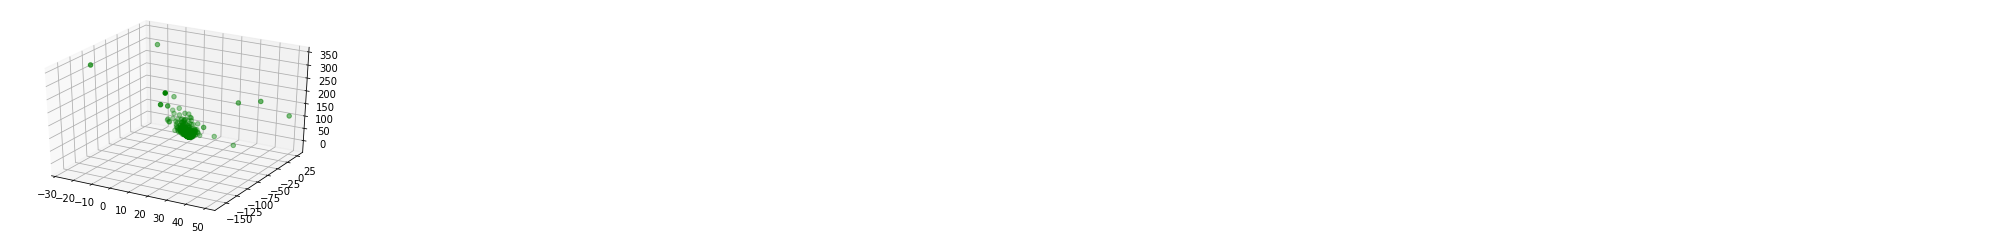

In [230]:
# EXERCISE 12 TAKE HOME

from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

fig = plt.figure()
fig1 = plt.figure()
fig2 = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ai = fig1.add_subplot(111, projection='3d')
aj = fig2.add_subplot(111, projection='3d')

Xx = X_reduced[X['category_name'] == category].T[0]
Yx = X_reduced[X['category_name'] == category].T[1]
Zx = X_reduced[X['category_name'] == category].T[2]

Xi = X_reduced[X['category_name'] == category].T[2]
Yi = X_reduced[X['category_name'] == category].T[0]
Zi = X_reduced[X['category_name'] == category].T[1]

Xj = X_reduced[X['category_name'] == category].T[1]
Yj = X_reduced[X['category_name'] == category].T[2]
Zj = X_reduced[X['category_name'] == category].T[0]

ax.scatter(Xx, Yx, Zx, c='r', marker='o')
ai.scatter(Xi, Yi, Zi, c='b', marker='o')
aj.scatter(Xj, Yj, Zj, c='g', marker='o')

ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

plt.show()

In [234]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [235]:
# EXERCISE 13 TAKE HOME

import plotly
plotly.tools.set_credentials_file(username='pablo.mp3', api_key='dMF50ajaPrPUCS5GUGog')

import plotly.plotly as py
import plotly.graph_objs as go

trace0 = go.Bar(
        x= ["term_"+str(i) for i in count_vect.get_feature_names()[:300]],
        y=term_frequencies[:300]
        )
data = [trace0]

py.iplot(data, filename = 'basic-bar', auto_open=True)

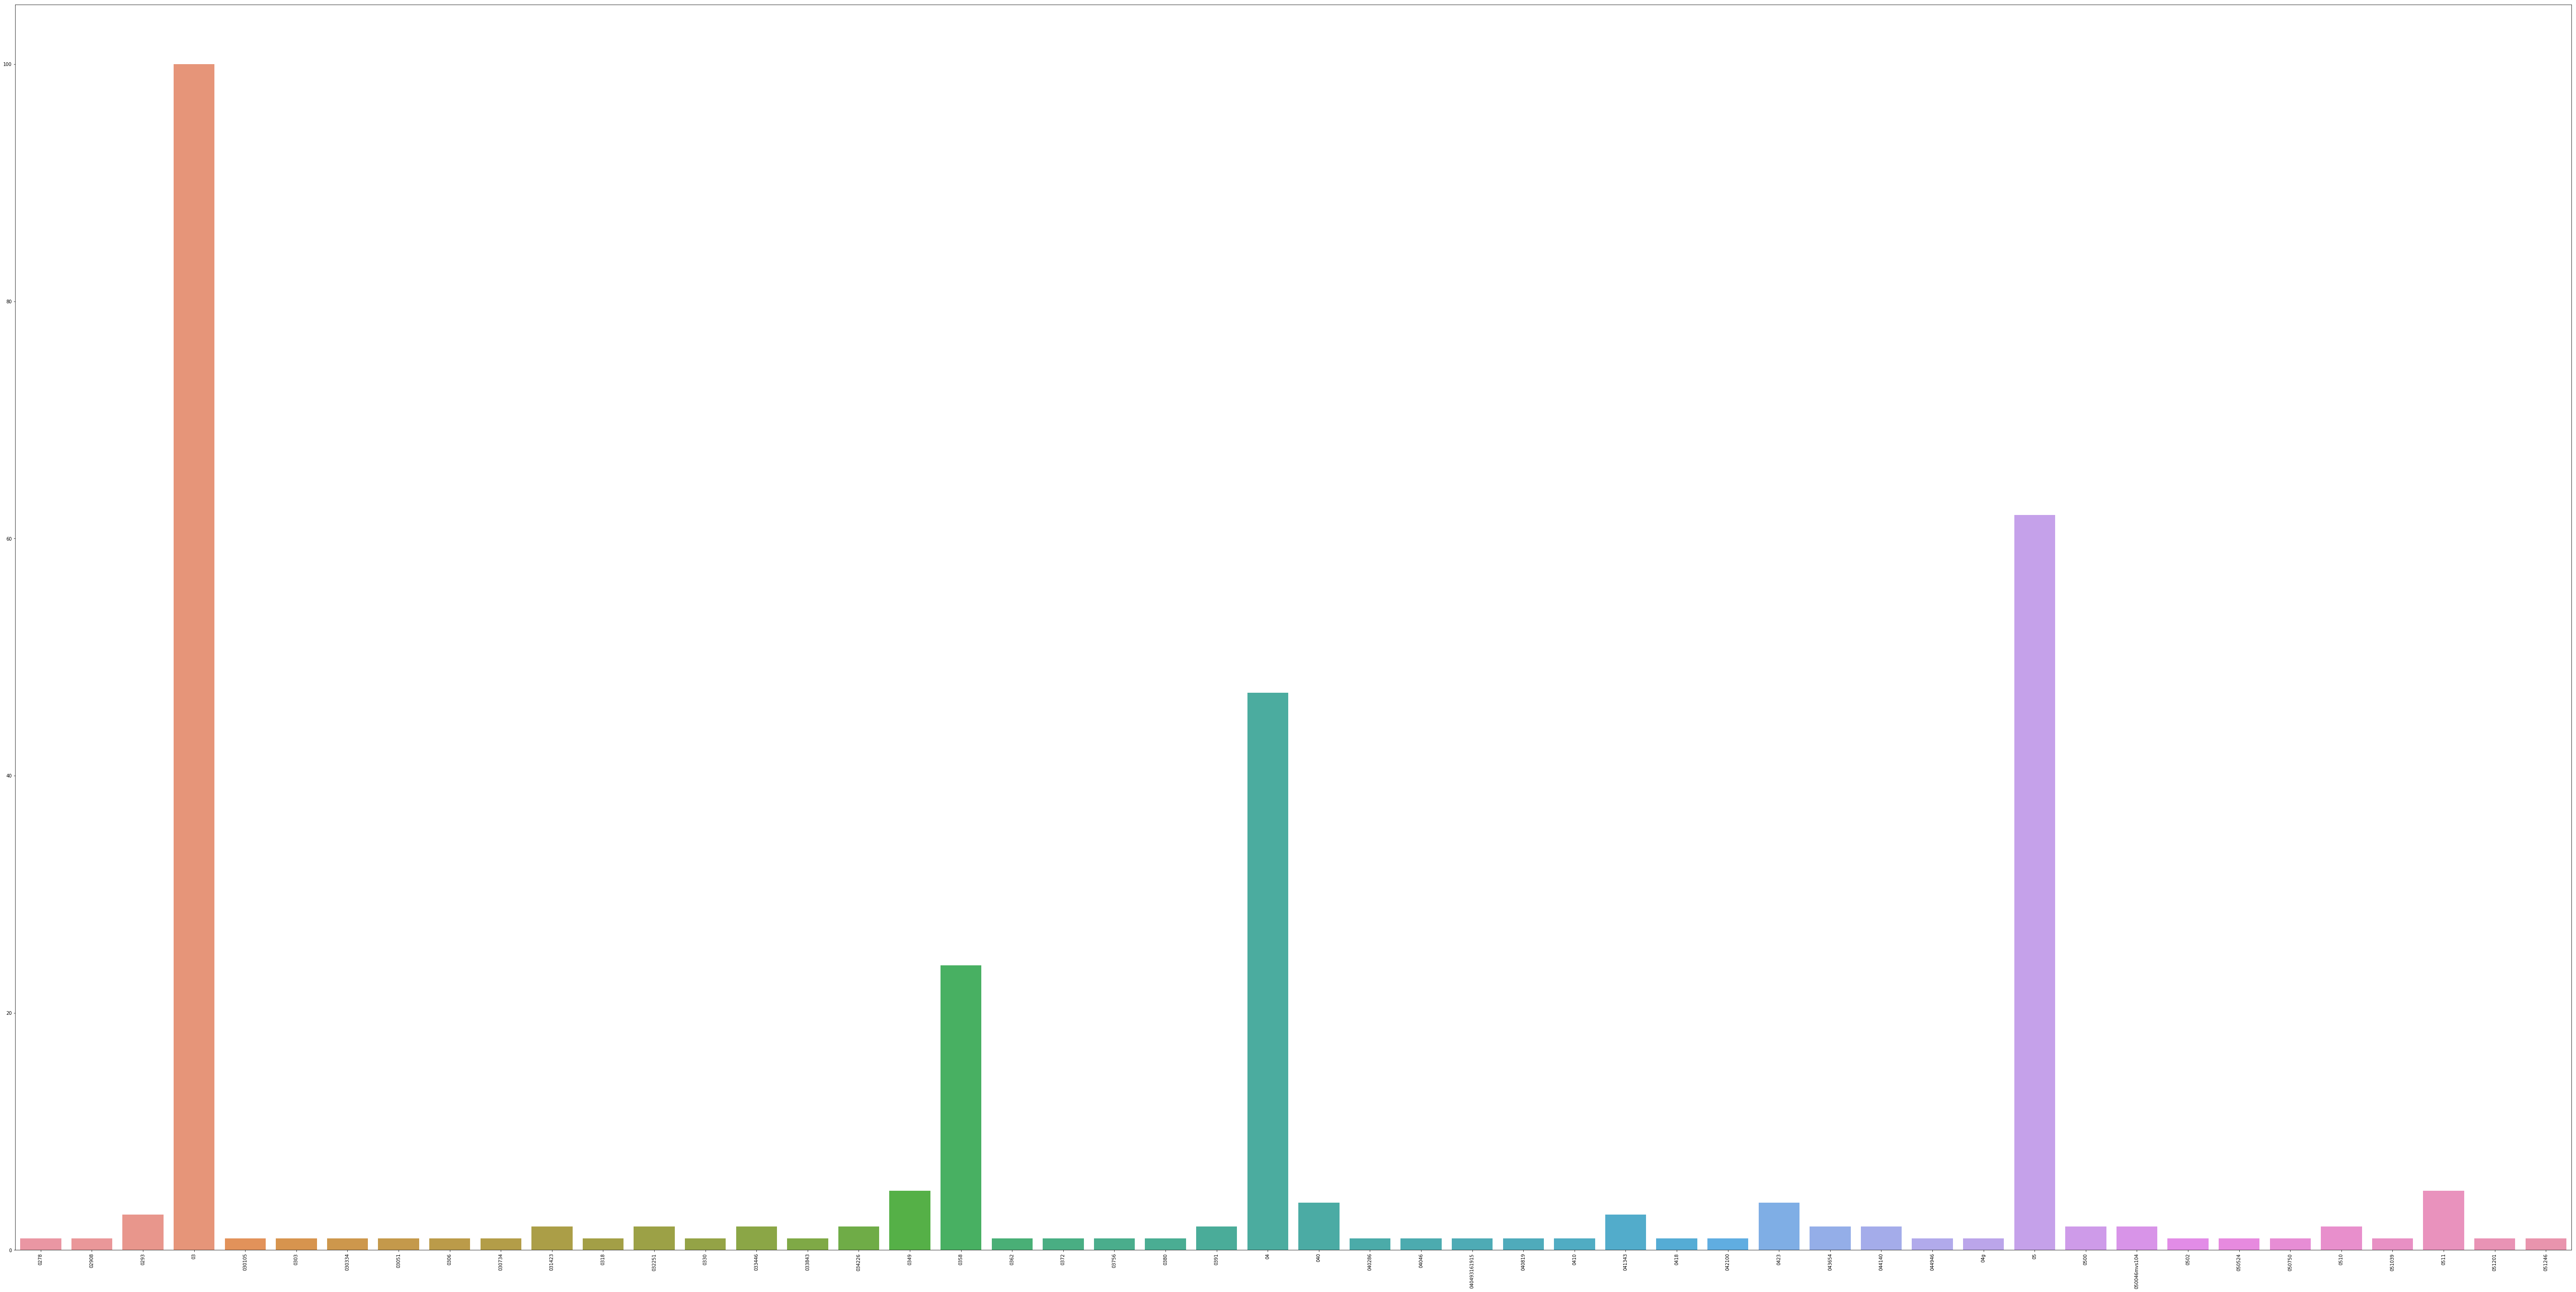

In [236]:
# EXERCISE 14 TAKE HOME

plt.subplots(figsize=(100, 50))
g = sns.barplot(x=count_vect.get_feature_names()[100:150], 
            y=term_frequencies[100:150])
g.set_xticklabels(count_vect.get_feature_names()[100:150], rotation = 90);

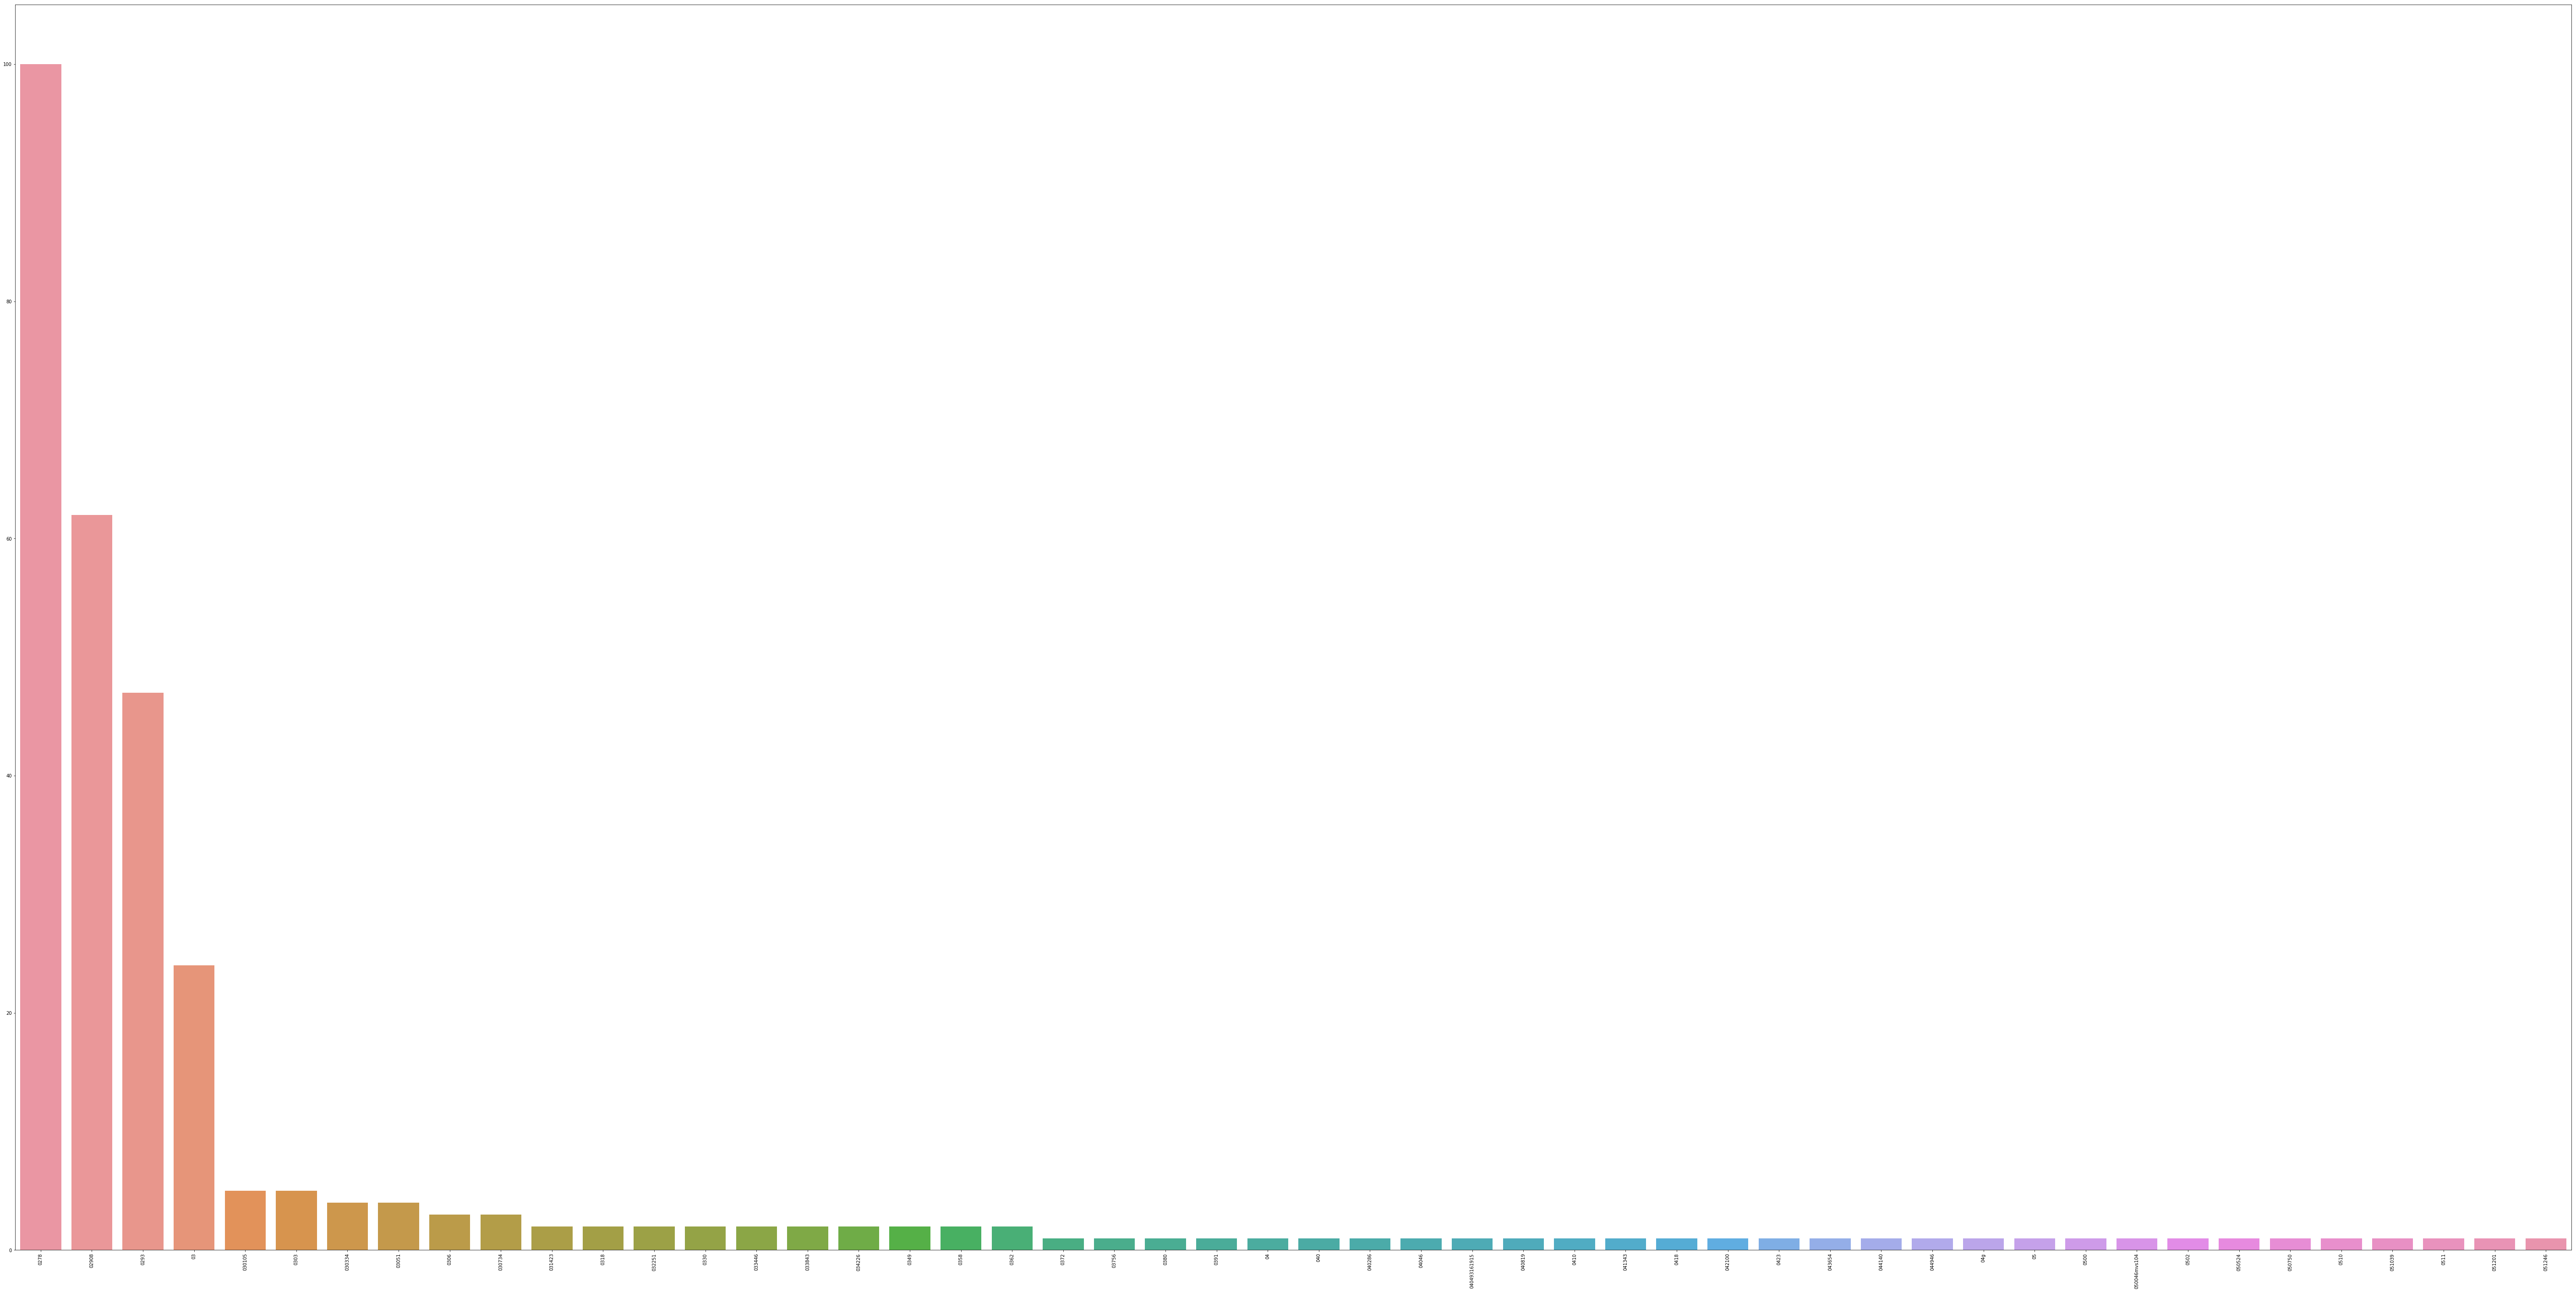

In [237]:
# EXERCISE 15 TAKE HOME

y=term_frequencies[100:150]
que = sorted(y, reverse=True)

plt.subplots(figsize=(100, 50))
g = sns.barplot(x=count_vect.get_feature_names()[100:150], 
            y=que)
g.set_xticklabels(count_vect.get_feature_names()[100:150], rotation = 90);

In [240]:
# EXERCISE 16 TAKE HOME

from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

mlb.fit(X.category_name)
mlb.classes_
X['bin_category_prime'] = mlb.transform(X['category_name']).tolist()
X[0:9]

#output of 3rd line:
#array(['alt.atheism', 'comp.graphics', 'sci.med',
#       'soc.religion.christian'], dtype='<U22')
# which means:
# alt.atheism = [1 0 0 0]
# comp.graphics = [0 1 0 0]
# sci.med = [0 0 1 0]
# soc.religion.christian = [0 0 0 1]
# it coincides with the previous example

,text,category,category_name,unigrams,bin_category_prime
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


In [2]:
#------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------
#--------------------------------- NOW THE SECOND PART OF THE ASSIGNMENT STARTS -----------------------------------------
#------------------------------------------------------------------------------------------------------------------------
#------------------------------------------------------------------------------------------------------------------------


# It is a good idea to store the filename into a variable.
# The variable can later become a function argument when the
# code is converted to a function body.

# We place the textfiles in the folder hw_1
# Open textfiles and read them

amazon = 'amazon_cells_labelled.txt'
# Using the newer with construct to close the file automatically
with open(amazon) as f:
    amazon_data = f.readlines()

imdb = 'imdb_labelled.txt'
# Using the newer with construct to close the file automatically
with open(imdb) as f:
    imdb_data = f.readlines()

yelp = 'yelp_labelled.txt'
# Using the newer with construct to close the file automatically
with open(yelp) as f:
    yelp_data = f.readlines()

merged_data = amazon_data + imdb_data + yelp_data
merged_data

['So there is no way for me to plug it in here in the US unless I go by a converter.\t0\n',
 'Good case, Excellent value.\t1\n',
 'Great for the jawbone.\t1\n',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!\t0\n',
 'The mic is great.\t1\n',
 'I have to jiggle the plug to get it to line up right to get decent volume.\t0\n',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.\t0\n',
 'If you are Razr owner...you must have this!\t1\n',
 'Needless to say, I wasted my money.\t0\n',
 'What a waste of money and time!.\t0\n',
 'And the sound quality is great.\t1\n',
 'He was very impressed when going from the original battery to the extended battery.\t1\n',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.\t0\n',
 'Very good quality though\t1\n',
 'The design is very odd, as the ear "clip" is not very comfortable at all.\t0\n',
 'H

In [3]:
# Check whether the data has merged correctly
len(merged_data)

3000

In [4]:
nice_sentence = []
nice_value = []

for element in merged_data:
    element = element.strip('\n')
    element = (element.split("\t"))
    nice_sentence.append(element[0]) #store sentences
    nice_value.append(element[1])    #store values of each sentence
    #print(element)

In [5]:
len(nice_sentence) #check length of sentences is ok
nice_sentence

['So there is no way for me to plug it in here in the US unless I go by a converter.',
 'Good case, Excellent value.',
 'Great for the jawbone.',
 'Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!',
 'The mic is great.',
 'I have to jiggle the plug to get it to line up right to get decent volume.',
 'If you have several dozen or several hundred contacts, then imagine the fun of sending each of them one by one.',
 'If you are Razr owner...you must have this!',
 'Needless to say, I wasted my money.',
 'What a waste of money and time!.',
 'And the sound quality is great.',
 'He was very impressed when going from the original battery to the extended battery.',
 'If the two were seperated by a mere 5+ ft I started to notice excessive static and garbled sound from the headset.',
 'Very good quality though',
 'The design is very odd, as the ear "clip" is not very comfortable at all.',
 'Highly recommend for any one who has a blue tooth phone.',
 'I advise EVERYO

In [6]:
len(nice_value) #check length of values is ok
nice_value

['0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '0'

In [7]:
# Create tag arrays for each company, associate each tag to the sentence they belong to,
# and add it to the dataframe in the next step
am = []
for i in range(1000):
       am.append('amazon')
im = []
for i in range(1000):
       im.append('imdb')
ye = []
for i in range(1000):
       ye.append('yelp')
tags = am + im + ye
tags

['amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',
 'amazon',

In [8]:
import pandas as pd
import numpy as np

# We create a dataframe with 3 columns from the previously created arrays: sentences, values and tags for each sentence
d = {'sentences': nice_sentence, 'valores': nice_value, 'tags': tags}
df = pd.DataFrame(data=d)
df

,sentences,valores,tags
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [9]:
# We can check if there is any value missing
df.isnull()

,sentences,valores,tags
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
5,False,False,False
6,False,False,False
7,False,False,False
8,False,False,False
9,False,False,False


In [10]:
# Check number of missing values
import helpers.data_mining_helpers as dmh
df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences    (The amoung of missing records is: , 0)
valores      (The amoung of missing records is: , 0)
tags         (The amoung of missing records is: , 0)
dtype: object

In [11]:
# We find out that there are 17 values which are duplicated
sum(df.duplicated())
#df.duplicated()

17

In [12]:
# We decide to drop the duplicate values and get the new length of the dataframe 
df.drop_duplicates(keep=False, inplace=True) # inplace applies changes directly on our dataframe
len(df)
df

,sentences,valores,tags
0,So there is no way for me to plug it in here i...,0,amazon
1,"Good case, Excellent value.",1,amazon
2,Great for the jawbone.,1,amazon
3,Tied to charger for conversations lasting more...,0,amazon
4,The mic is great.,1,amazon
5,I have to jiggle the plug to get it to line up...,0,amazon
6,If you have several dozen or several hundred c...,0,amazon
7,If you are Razr owner...you must have this!,1,amazon
8,"Needless to say, I wasted my money.",0,amazon
9,What a waste of money and time!.,0,amazon


In [90]:
# Since 44 duplicated values have been dropped, it is necessary to reset the indices in order to identify them correctly for
# operations that will be performed later on.
df.reset_index(drop=True, inplace=True)
df

,sentences,valores,tags,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"
5,I have to jiggle the plug to get it to line up...,0,amazon,"[I, have, to, jiggle, the, plug, to, get, it, ..."
6,If you have several dozen or several hundred c...,0,amazon,"[If, you, have, several, dozen, or, several, h..."
7,If you are Razr owner...you must have this!,1,amazon,"[If, you, are, Razr, owner, ..., you, must, ha..."
8,"Needless to say, I wasted my money.",0,amazon,"[Needless, to, say, ,, I, wasted, my, money, .]"
9,What a waste of money and time!.,0,amazon,"[What, a, waste, of, money, and, time, !, .]"


In [38]:
# We display a random sample of 15 sentences
df_sample = df.sample(n=150)
df_sample

,sentences,valores,tags,unigrams
386,I highly recommend these and encourage people ...,1,amazon,"[I, highly, recommend, these, and, encourage, ..."
2262,This place is amazing!,1,yelp,"[This, place, is, amazing, !]"
1451,"I was very uneasy with how bad this movie was,...",0,imdb,"[I, was, very, uneasy, with, how, bad, this, m..."
1380,It's a feel-good film and that's how I felt wh...,1,imdb,"[It, 's, a, feel-good, film, and, that, 's, ho..."
1540,The film looks cheap and bland.,0,imdb,"[The, film, looks, cheap, and, bland, .]"
2357,I will come back here every time I'm in Vegas.,1,yelp,"[I, will, come, back, here, every, time, I, 'm..."
195,"useless phone, simply deaf.",0,amazon,"[useless, phone, ,, simply, deaf, .]"
1942,Hayao Miyazaki's latest and eighth film for St...,1,imdb,"[Hayao, Miyazaki, 's, latest, and, eighth, fil..."
2409,Wow very spicy but delicious.,1,yelp,"[Wow, very, spicy, but, delicious, .]"
909,As I said above....PRETTY USELESS!,0,amazon,"[As, I, said, above, ..., .PRETTY, USELESS, !]"


imdb      994
yelp      992
amazon    980
Name: tags, dtype: int64


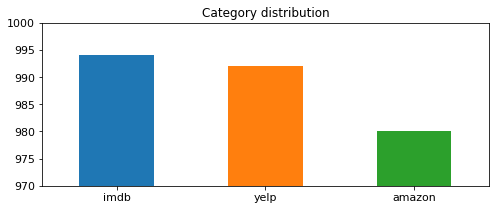

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
print(df.tags.value_counts())

# We want to plot the number of rows close to the upper boundary, in order to compare
# them and get a more visual solution

df.tags.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [970, 1000],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

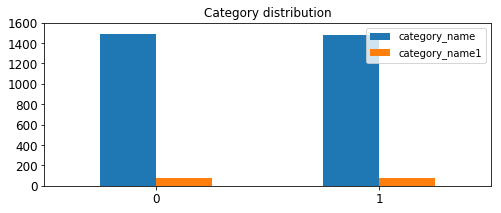

In [40]:
grafica = pd.DataFrame({'category_name': df.valores.value_counts(), 'category_name1': df_sample.valores.value_counts()})

grafica.plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 1600], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

In [41]:
# Feature Creation - we want to divide each sentence in order to apply later some kind of word detection
import nltk
# takes a while to process
df['unigrams'] = df['sentences'].apply(lambda x: dmh.tokenize_text(x))


In [42]:
df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [43]:
df[0:5]

,sentences,valores,tags,unigrams
0,So there is no way for me to plug it in here i...,0,amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,amazon,"[Tied, to, charger, for, conversations, lastin..."
4,The mic is great.,1,amazon,"[The, mic, is, great, .]"


In [44]:
# Example for the first three sentences
list(df[0:3]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.'],
 ['Good', 'case', ',', 'Excellent', 'value', '.'],
 ['Great', 'for', 'the', 'jawbone', '.']]

In [139]:
# Feature subset selection
# Count Vectorizer
# df_counts

from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentences)
print(df_counts)

  (0, 1013)	1
  (0, 647)	1
  (0, 1982)	1
  (0, 4795)	1
  (0, 4837)	1
  (0, 4533)	1
  (0, 2158)	1
  (0, 2314)	2
  (0, 2433)	1
  (0, 3387)	1
  (0, 4611)	1
  (0, 2810)	1
  (0, 1829)	1
  (0, 4989)	1
  (0, 3044)	1
  (0, 2427)	1
  (0, 4547)	1
  (0, 4163)	1
  (1, 4863)	1
  (1, 1603)	1
  (1, 713)	1
  (1, 1993)	1
  (2, 2450)	1
  (2, 2023)	1
  (2, 4533)	1
  :	:
  (2965, 1387)	1
  (2965, 5112)	1
  (2965, 3437)	1
  (2965, 3858)	1
  (2965, 2068)	1
  (2965, 589)	1
  (2965, 4632)	1
  (2965, 785)	1
  (2965, 4550)	1
  (2965, 1540)	1
  (2965, 2631)	1
  (2965, 3167)	1
  (2965, 297)	1
  (2965, 4595)	1
  (2965, 2983)	1
  (2965, 4976)	1
  (2965, 3098)	1
  (2965, 4544)	1
  (2965, 2282)	1
  (2965, 647)	1
  (2965, 4533)	3
  (2965, 2314)	1
  (2965, 2433)	1
  (2965, 4611)	1
  (2965, 4547)	1


In [46]:
# Check the number of type 00 (the first one), which is found in sentence 3 position 45
df_counts[0:5, 0:100].toarray()
algo = df_counts[4:5, 0:100].toarray()  #array
bella = df_counts[0:5, 0:100]  #sparse
print(bella)

count_vect.inverse_transform(algo)
count_vect.get_feature_names()[0:10]

  (3, 45)	1


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

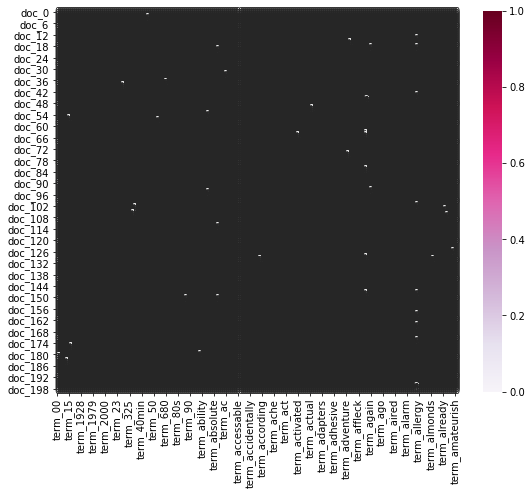

In [47]:
# Plotting a nice view of the array used above wrt their indices
# IT WILL TAKE A COUPLE MINUTES AT LEAST - PLEASE BE PATIENT
import seaborn as sns

plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(df.index)[0:200]]
plot_z = df_counts[0:200, 0:200].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [48]:
# Dimensionality reduction
# df_counts is reduced into only 2 columns
from sklearn.decomposition import PCA
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
df_reduced.shape
#df_counts.shape

(2966, 2)

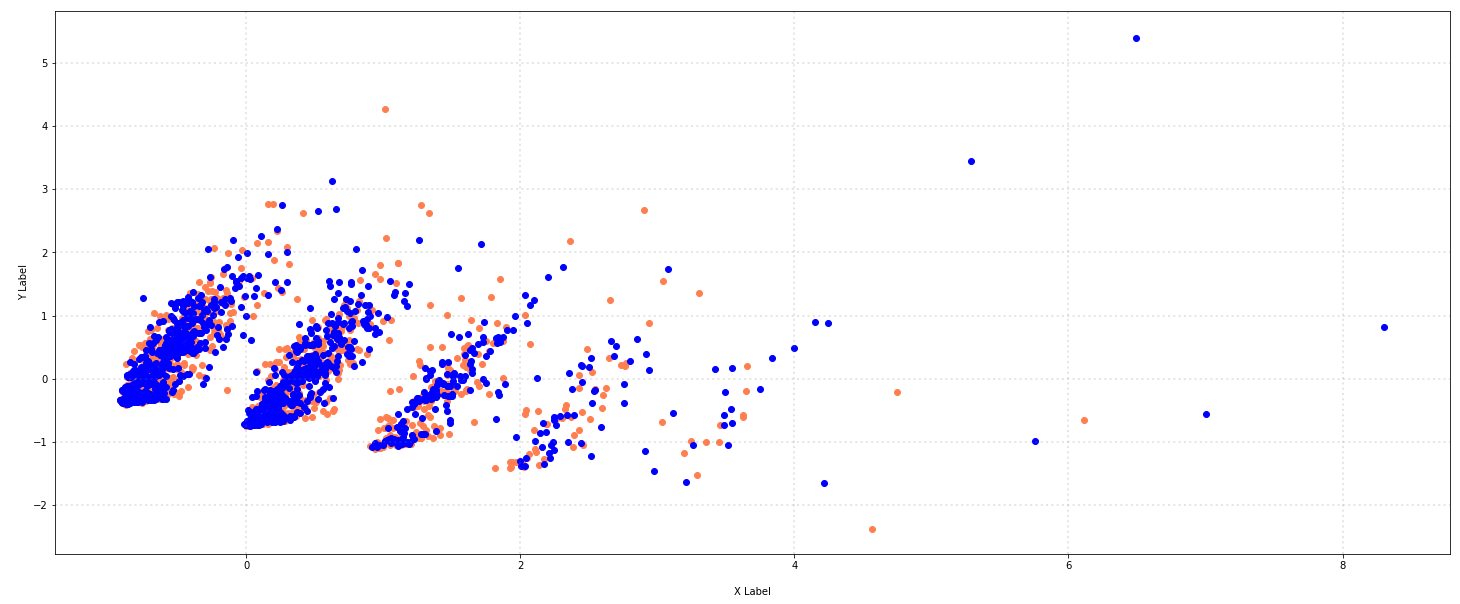

In [49]:
col = ['coral', 'blue', 'black', 'm']
col2 = ['0','1']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, col2):
    xs = df_reduced[df['valores'] == category].T[0]
    ys = df_reduced[df['valores'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

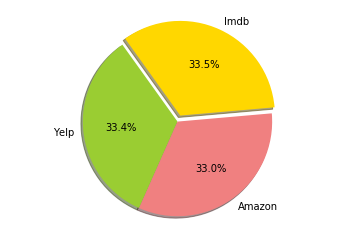

imdb      994
yelp      992
amazon    980
Name: tags, dtype: int64

In [50]:
# N E W  D A T A  V I S U A L I Z A T I O N S

import matplotlib.pyplot as plt
 
# Data to plot
labels = 'Imdb', 'Yelp', 'Amazon'
sizes = df.tags.value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
explode = (0.07, 0.0, 0.0)  # We explode, for example, the 1st slice
 
# Plot the pie chart and also display the total number for each tag
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=5)
 
plt.axis('equal')
plt.show()
df.tags.value_counts()

In [198]:
# T F - I D F, term frequency–inverse document frequency
# TF
from sklearn.feature_extraction.text import TfidfVectorizer

# corpus is the collection, and we choose to make it for the first 10 sentences
corpus = df.sentences[:]

vectorizer = TfidfVectorizer()
TF = vectorizer.fit_transform(corpus)
h1 = vectorizer.get_feature_names()

#print(TF.shape)
print(TF)
print()

# If we want to see the first 100 words that are used
print(h1[0:100])


  (0, 4163)	0.18732623497129533
  (0, 4547)	0.20753601955433676
  (0, 2427)	0.12076579721018571
  (0, 3044)	0.22333348868575992
  (0, 4989)	0.24912344333209688
  (0, 1829)	0.1566174164067269
  (0, 2810)	0.22860048547900147
  (0, 4611)	0.12738792959895945
  (0, 3387)	0.308742072663767
  (0, 2433)	0.1195299613616837
  (0, 2314)	0.2951590951123245
  (0, 2158)	0.22271395484174064
  (0, 4533)	0.08650159202611736
  (0, 4837)	0.2754618537832122
  (0, 4795)	0.3320528597961367
  (0, 1982)	0.23146779744100598
  (0, 647)	0.22333348868575992
  (0, 1013)	0.3986132975572462
  (1, 1993)	0.33547553468614605
  (1, 713)	0.5121812678256109
  (1, 1603)	0.47347841205424385
  (1, 4863)	0.6332019486974009
  (2, 1829)	0.35208890157205136
  (2, 4533)	0.1944627310261341
  (2, 2023)	0.4045808419840924
  :	:
  (2965, 4547)	0.1527080241170054
  (2965, 4611)	0.09373389287887006
  (2965, 2433)	0.08795188546798595
  (2965, 2314)	0.10859117928433949
  (2965, 4533)	0.19094739163326588
  (2965, 647)	0.16433203185450276


In [159]:
# S I M I L A R I T Y
# Between sentences
# Run it several times to see more than just one example

# COUNT VECTORIZER

from scipy import spatial
import random

#In case we would  like to compare two random sentences:
#generate two random states between 0 and the size of the reduced dataset
random1 = random.randint(0, 2965) 
random2 = random.randint(0, 2965)

df_sample1 = df_counts[0:1].toarray() #random sentence 1
bella1 = df_counts[random1:random1+1]  #sparse

df_sample2 = df_counts[2:3].toarray() #random sentence 2
bella2 = df_counts[random2:random2+1]  #sparse

result = 1 - spatial.distance.cosine(df_sample1, df_sample2) #compute similarity between both sentences

#print(df.sentences.value_counts())

print(nice_sentence[0:1])
print('')
print(nice_sentence[2:3])
result

['So there is no way for me to plug it in here in the US unless I go by a converter.']

['Great for the jawbone.']


0.21821789023599236

In [199]:
# T F I D F

# In case we would  like to compare two random sentences:
# generate two random states between 0 and the size of the reduced dataset
random1 = random.randint(0, 2965) 
random2 = random.randint(0, 2965)

df_sample1 = TF[0:1,:].toarray() #sentence 1
#bella1 = TF[random1:random1+1]  #sparse

df_sample2 = TF[2:3,:].toarray() #sentence 2
#bella2 = TF[random2:random2+1]  #sparse

result = 1 - spatial.distance.cosine(df_sample1, df_sample2) #compute similarity between both sentences

print(nice_sentence[0:1])
print('')
print(nice_sentence[2:3])
result

['So there is no way for me to plug it in here in the US unless I go by a converter.']

['Great for the jawbone.']


0.07196458993320431

In [200]:
# WORD FREQUENCY of two randomly selected sentences - Data Exploration
# Run it several times to see more than just one example

from collections import defaultdict

random3 = random.randint(0, 2965)
words = "\n".join(nice_sentence[random3].split("\n")) #1st sentence
words1 = "\n".join(nice_sentence[random3+1].split("\n")) #2nd sentence
space = ' '
merged_words = words + space + words1 # we merge them together + adding an space bar

# calculating the word frequency of both sentences together
d = defaultdict(int)
for word in merged_words.split():
    d[word] += 1

    
print(merged_words)
d

Great Earpiece. Excellent hands free tool.


defaultdict(int,
            {'Great': 1,
             'Earpiece.': 1,
             'Excellent': 1,
             'hands': 1,
             'free': 1,
             'tool.': 1})

In [201]:
# Naive Bayes classifier in order to automatically classify the records into their categories

# Gaussian Naive Bayes

import numpy as np
X = df_counts[:,:].toarray()
Y = df.valores[:]
from sklearn.naive_bayes import GaussianNB

# training fit
clf = GaussianNB()
clf.fit(X, Y)

# In case we want to compare it with a random sentence:
# np.random.randint(2, size=(1, 100))

# We compare every predicted value with the actual one and calculate the accuracy ratio (%)

var_correct = 0
var_incorrect = 0

for i in range (0,len(df)):
    prediction = clf.predict(X[i:i+1])
    real = df.valores[i]
    if prediction == real:
        var_correct += 1 #increase counter for correct value
    else:
        var_incorrect += 1 #increase counter for incorrect value

print('Number of correct predictions performed: ', var_correct)
print('Number of incorrect predictions performed: ', var_incorrect)

print('Accuracy ratio is: ', ((var_correct*100)/2966), '%')

Number of correct predictions performed:  2572
Number of incorrect predictions performed:  394
Accuracy ratio is:  86.71611598111936 %


In [202]:
# With partial fit
clf_pf = GaussianNB()
clf_pf.partial_fit(X, Y, np.unique(Y))

# We compare every predicted value with the actual one and calculate the accuracy ratio (%)

var_correct = 0
var_incorrect = 0

for i in range (0,len(df)):
    prediction = clf_pf.predict(X[i:i+1])
    real = df.valores[i]
    if prediction == real:
        var_correct += 1 #increase counter for correct value
    else:
        var_incorrect += 1 #increase counter for incorrect value

print('Number of correct predictions performed: ', var_correct)
print('Number of incorrect predictions performed: ', var_incorrect)

print('Accuracy ratio is: ', ((var_correct*100)/2966), '%')

Number of correct predictions performed:  2572
Number of incorrect predictions performed:  394
Accuracy ratio is:  86.71611598111936 %


In [206]:
# Multinomial Naive Bayes, comparison with Count Vectorizer

import numpy as np
from sklearn.naive_bayes import MultinomialNB

X = df_counts[:,:]
y = df.valores[:]

clf = MultinomialNB()
clf.fit(X, y)

# We compare every predicted value with the actual one and calculate the accuracy ratio (%)

var_correct = 0
var_incorrect = 0

for i in range (0,len(df)):
    prediction = clf.predict(X[i:i+1])
    real = df.valores[i]
    if prediction == real:
        var_correct += 1 #increase counter for correct value
    else:
        var_incorrect += 1 #increase counter for incorrect value

print('Number of correct predictions performed: ', var_correct)
print('Number of incorrect predictions performed: ', var_incorrect)

print('Accuracy ratio is: ', ((var_correct*100)/2966), '%')
#print(df.valores[:])
#len(df)

Number of correct predictions performed:  2803
Number of incorrect predictions performed:  163
Accuracy ratio is:  94.5043830074174 %


In [207]:
# Multinomial Naive Bayes, comparison with TFIDF

import numpy as np
from sklearn.naive_bayes import MultinomialNB

X = TF[:,:]
y = df.valores[:]

clf = MultinomialNB()
clf.fit(X, y)

# We compare every predicted value with the actual one and calculate the accuracy ratio (%)

var_correct = 0
var_incorrect = 0

for i in range (0,len(df)):
    prediction = clf.predict(X[i:i+1])
    real = df.valores[i]
    if prediction == real:
        var_correct += 1 #increase counter for correct value
    else:
        var_incorrect += 1 #increase counter for incorrect value

print('Number of correct predictions performed: ', var_correct)
print('Number of incorrect predictions performed: ', var_incorrect)

print('Accuracy ratio is: ', ((var_correct*100)/2966), '%')
#print(df.valores[:])
#len(df)

Number of correct predictions performed:  2826
Number of incorrect predictions performed:  140
Accuracy ratio is:  95.27983816587998 %
